#### 1.	What is our independent variable? What is our dependent variable?
- Independent variable: whether the words match the colors
- Dependent variable: the time it takes to name the ink colors

#### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
Null hypothesis: whether the words match the colors or not does not have any impact on the time it takes to name the ink colors.

Alternative hypothesis: it takes longer to name the ink colors where the words do not match the color

Justification:
It takes more time to first ignore the words that don’t match the color, think which is the right color, and answer the right color, than simply reading the words that match the color.

$$H_0: \mu_I - \mu_C = 0$$
$$H_a: \mu_I > \mu_C $$
where $\mu_I$ and $\mu_C$ are the average time to say incongruent and congruent words, respectively.
As shown above, one tailed hypothesis test will be used.
Furthermore, since there are only 24 samples, t-test will be used instead of z-test. Specifically, dependent 2-sample t-test will be used with the following assumptions:
- population's standard deviation is unknown
- the reading of congruent and incongruent words are coupled and assumed to be not independent events
- assume distributions are approximately normal

#### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
Mean for congruent is 14.05
Mean for incongruent is 22.0

Standard deviation for congruent is 3.56
Standard deviation for incongruent is 4.80

In [1]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import math

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
means = df.mean(axis=0)
means

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [3]:
stdev = df.std(axis=0)
stdev

Congruent      3.559358
Incongruent    4.797057
dtype: float64

#### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
The figure below shows that most of the time, it takes longer to say the color of incongruent words.

<IPython.core.display.Javascript object>


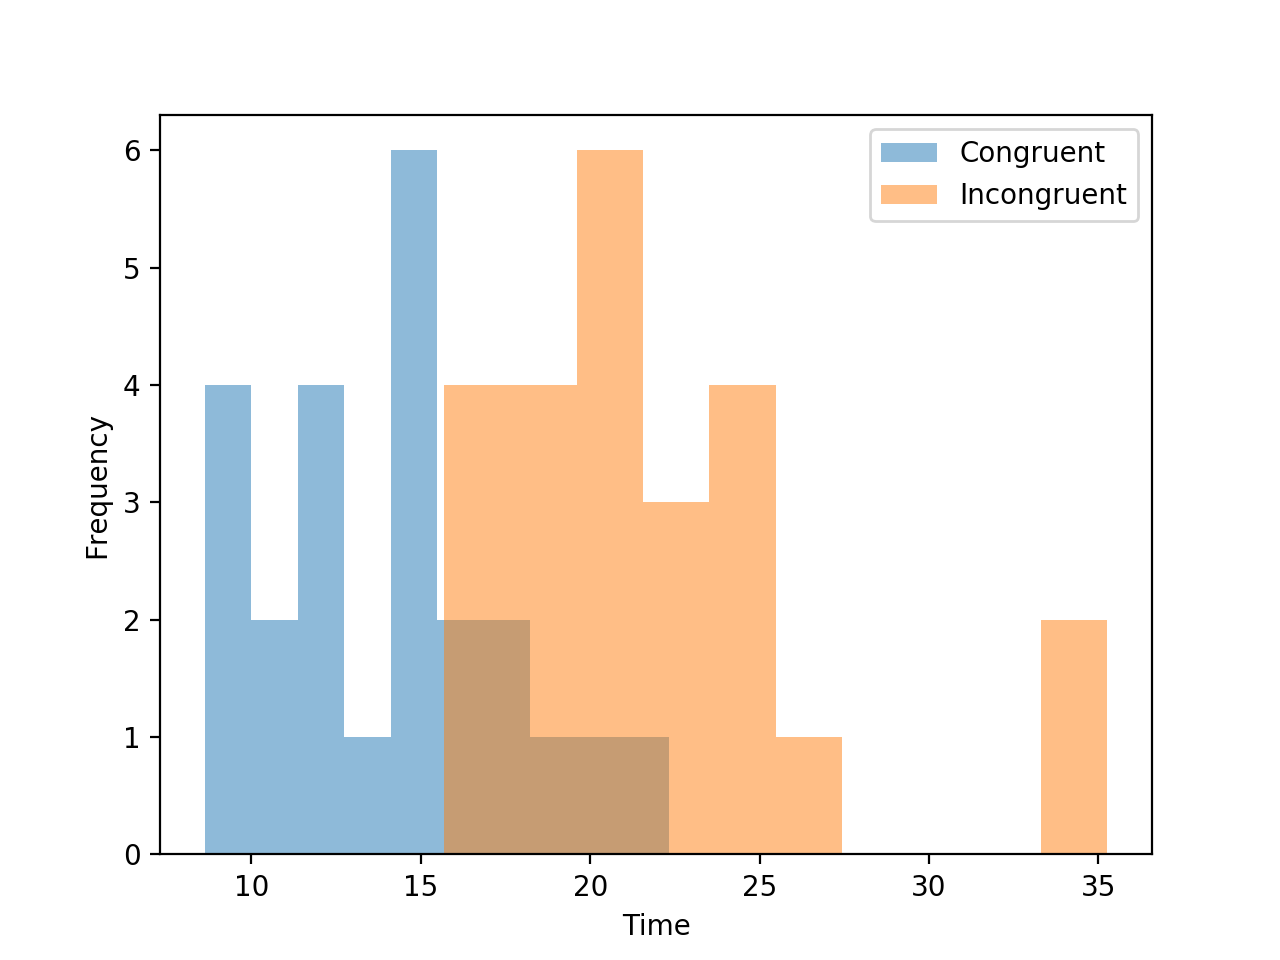

In [4]:
%matplotlib notebook
plt.figure()
plt.hist(df['Congruent'],label = 'Congruent',alpha=0.5)
plt.hist(df['Incongruent'],label = 'Incongruent',alpha=0.5)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Frequency');

#### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?
Here, I am using t-test to perform the hypothesis testing with 95% confidence.
The t statistics value is 8.02.
The p-value as calculated below is 2.1e-8, which is much smaller than 0.05.
Thus, the conclusion is it takes significantly more time to say the color of incongruent words than congruent words. This conclusion meets my expectation.

In [25]:
#Calculate t-statistics
df['delta'] = df['Incongruent']-df['Congruent']
delta_mean = df['delta'].mean()
delta_se = (df['delta'].std())/math.sqrt(df.shape[0])
t_stats = delta_mean/delta_se
t_stats

8.020706944109957

In [32]:
#Calculate p-value
p_val = 1-st.t.cdf(t_stats,df.shape[0]-1)
print('%0.9f' %p_val)

0.000000021


In [11]:
df['Congruent'].describe()

count    24.000000
mean     14.051125
std       3.559358
min       8.630000
25%      11.895250
50%      14.356500
75%      16.200750
max      22.328000
Name: Congruent, dtype: float64

In [10]:
st.ttest_1samp(df['Congruent'], 14)

Ttest_1sampResult(statistic=0.07036671477832335, pvalue=0.944510041580506)

In [14]:
st.ttest_ind(df['Congruent'],df['Incongruent'])

Ttest_indResult(statistic=-6.5322505539032285, pvalue=4.5949489622951854e-08)

In [16]:
# Paried tests

st.ttest_rel(df['Congruent'],df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)